# Umbralisación Blanco y Negro

In [2]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas

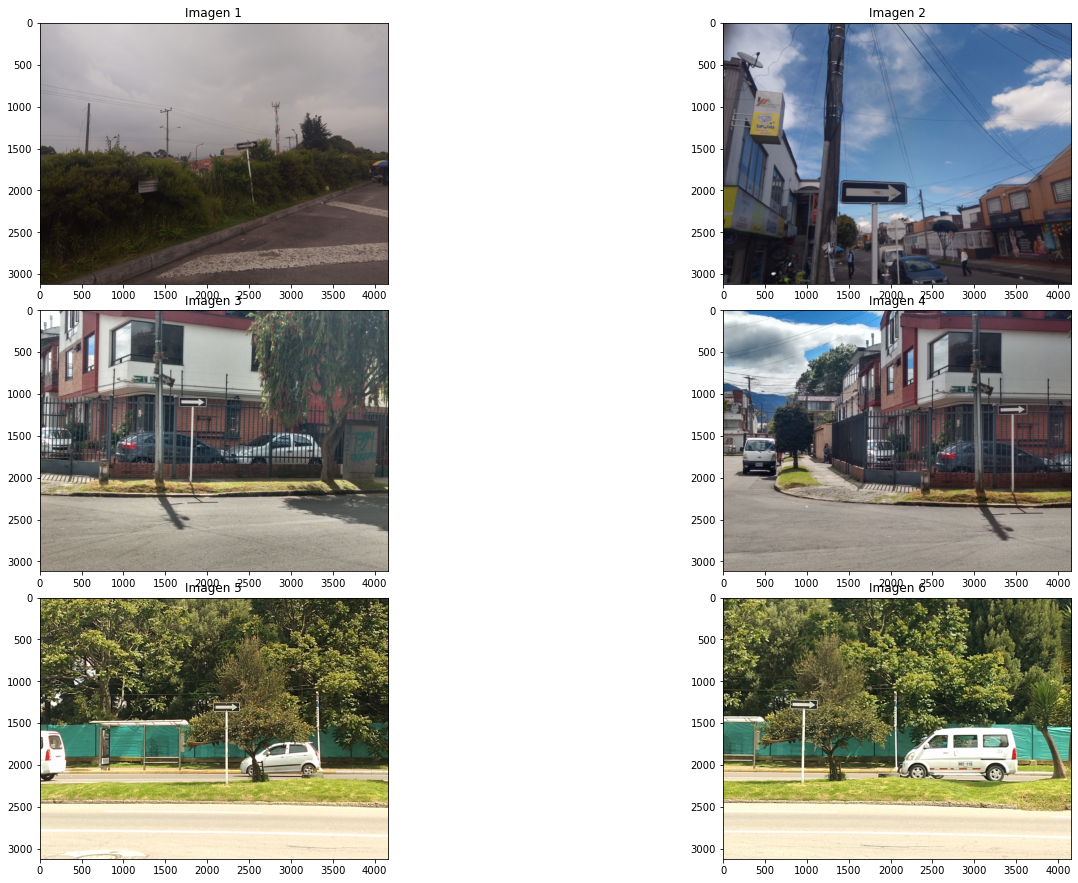

In [5]:
#lectura de las imágenes
ima1=cv2.imread("img/Flechader1.jpg")
ima2=cv2.imread("img/Flechader2.jpg")
ima3=cv2.imread("img/Flechader3.jpg")
ima4=cv2.imread("img/Flechader4.jpg")
ima5=cv2.imread("img/Flechader5.jpg")
ima6=cv2.imread("img/Flechader6.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(4,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(4,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(4,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(4,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(4,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

## Umbralisación HSV

In [6]:
def umbral_hsv(imagen,umbral_bajo,umbral_alto):
    img_hsv=cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV)
    mask= cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
    res= cv2.bitwise_and(imagen,imagen,mask=mask)
    plt.figure();
    plt.imshow(imagen),plt.xticks([]), plt.yticks([])
    plt.figure();
    plt.subplot(1,2,1);plt.imshow(mask, cmap='gray'),plt.title('1'),plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2);plt.imshow(res),plt.title('2'),plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

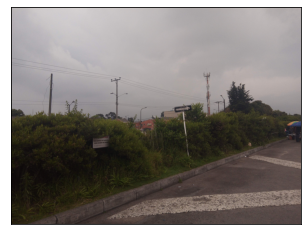

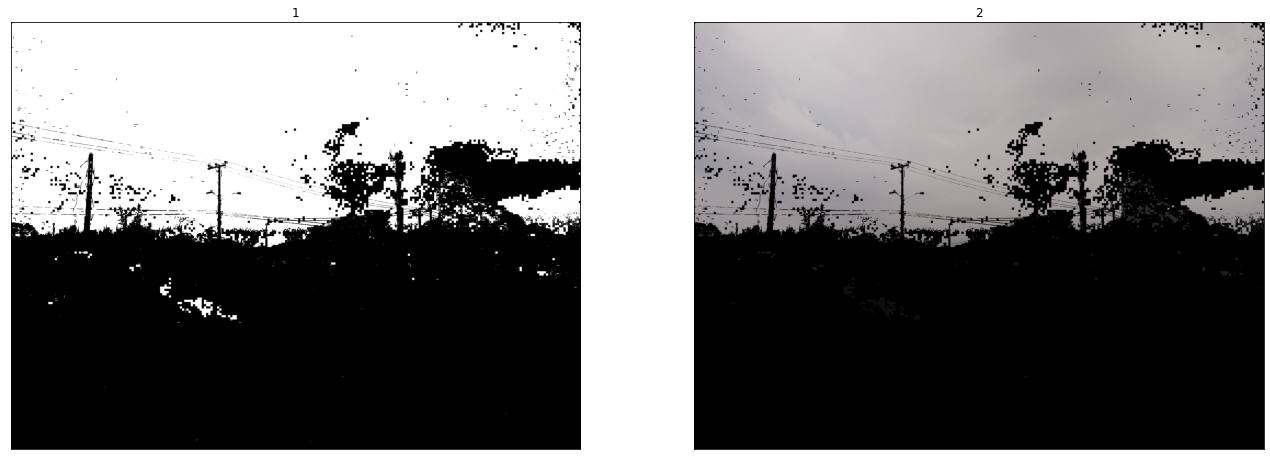

In [8]:
umbral_bajo= (0,0,0)
umbral_alto= (255,10,255)
umbral_hsv(ima1,umbral_bajo,umbral_alto)

# Umbralisación Adaptativa

In [39]:
def black_adapt(imagen,sz,c):
    ima=cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist(ima, [0], None, [256], [0, 255])
    cv2.normalize(hist,hist,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX)
    th = cv2.adaptiveThreshold(ima,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,sz,c)
    ima_umb= cv2.bitwise_and(ima,th)
    plt.figure()
    plt.subplot(1,2,1);plt.imshow(ima,cmap='gray', vmin=0, vmax=255),plt.title('Imagen Blanco y Negro'),plt.xticks([]), plt.yticks([]);
    plt.subplot(1,2,2);plt.plot(hist, color='gray'),plt.title('Histograma escala de gris')
    plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=2, hspace=0.1, wspace=0.2)
    plt.figure()
    plt.subplot(1,2,1);plt.imshow(th,cmap='gray', vmin=0, vmax=255),plt.title('Imagen'),plt.xticks([]), plt.yticks([]);
    plt.subplot(1,2,2);plt.imshow(ima_umb, cmap='gray'),plt.title('Histograma escala de gris')
    plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=2, hspace=0.1, wspace=0.2)

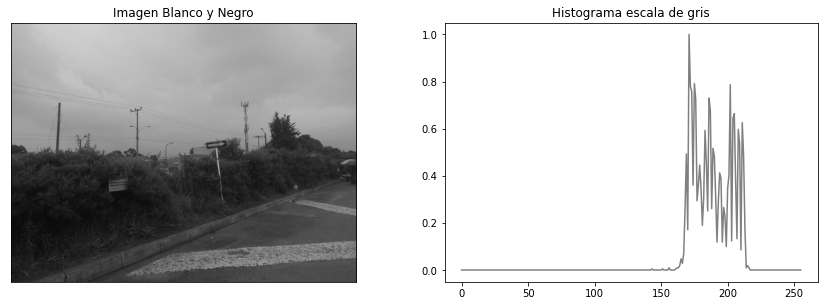

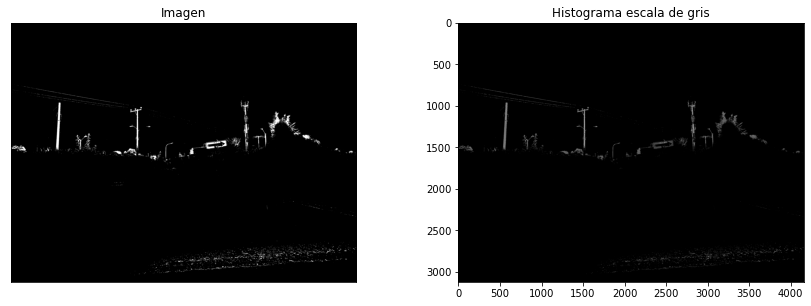

In [40]:
black_adapt(ima1,201,40)

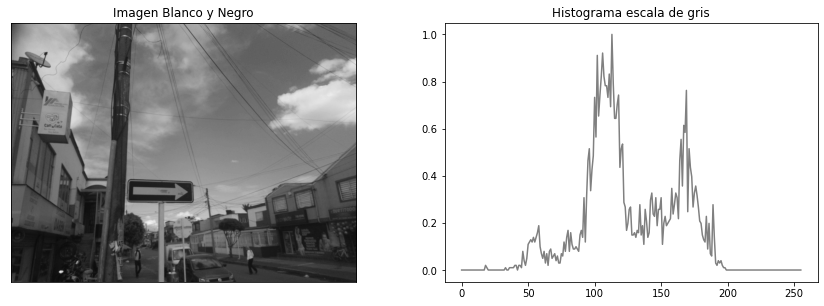

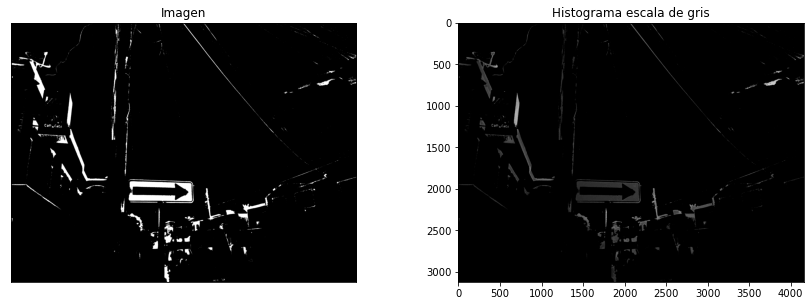

In [41]:
black_adapt(ima2,201,40)

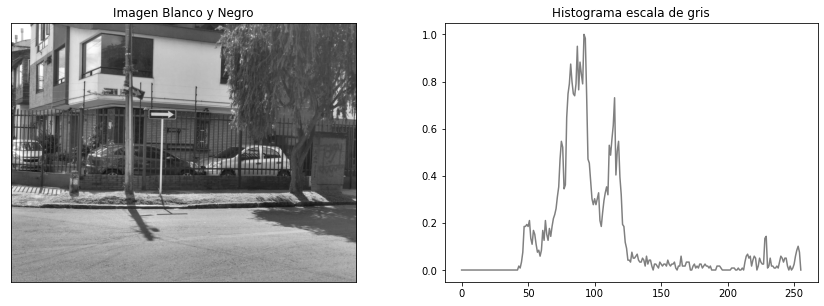

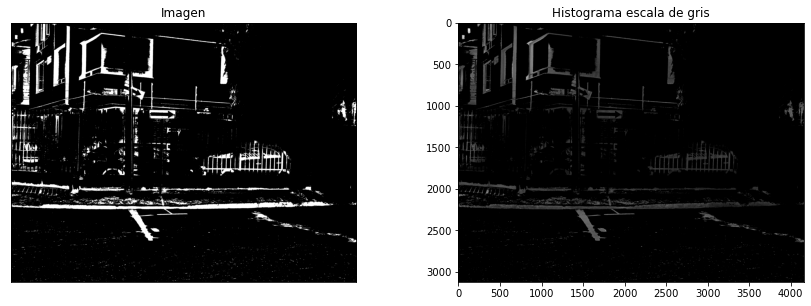

In [42]:
black_adapt(ima3,201,40)

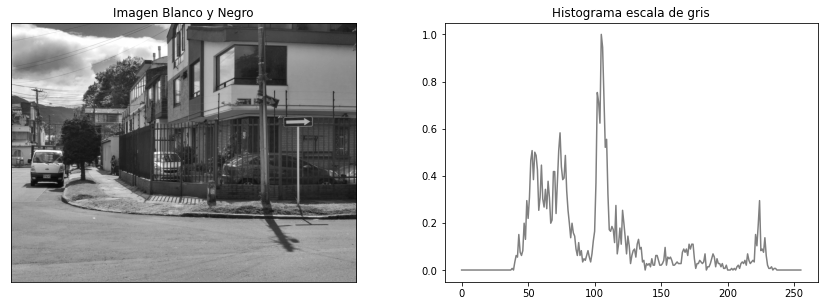

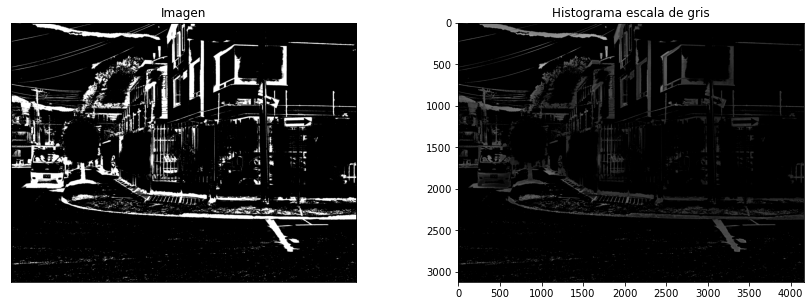

In [44]:
black_adapt(ima4,201,30)

In [30]:
def white_adapt(imagen,sz,c):
    ima=cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist(ima, [0], None, [256], [0, 255])
    cv2.normalize(hist,hist,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX)
    th = cv2.adaptiveThreshold(ima,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,sz,c)
    ima_umb= cv2.bitwise_and(ima,th)
    plt.figure()
    plt.subplot(1,2,1);plt.imshow(ima,cmap='gray', vmin=0, vmax=255),plt.title('Imagen Blanco y Negro'),plt.xticks([]), plt.yticks([]);
    plt.subplot(1,2,2);plt.plot(hist, color='gray'),plt.title('Histograma escala de gris')
    plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=2, hspace=0.1, wspace=0.2)
    plt.figure()
    plt.subplot(1,2,1);plt.imshow(th,cmap='gray', vmin=0, vmax=255),plt.title('Imagen'),plt.xticks([]), plt.yticks([]);
    plt.subplot(1,2,2);plt.imshow(ima_umb, cmap='gray'),plt.title('Histograma escala de gris')
    plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=2, hspace=0.1, wspace=0.2)

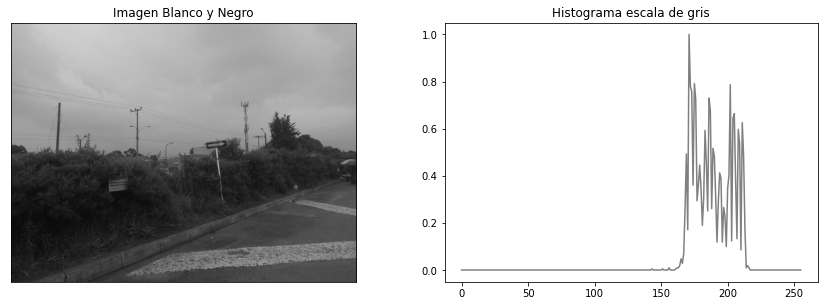

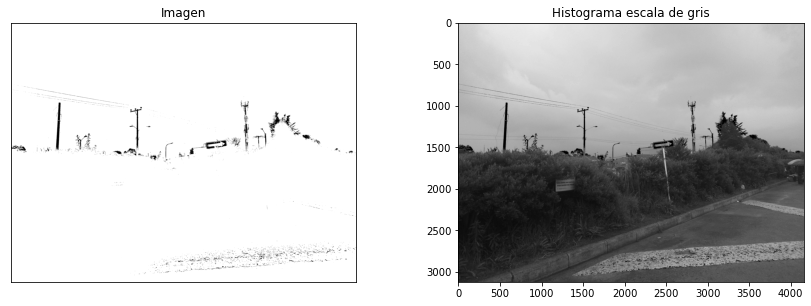

In [33]:
white_adapt(ima1,201,40)

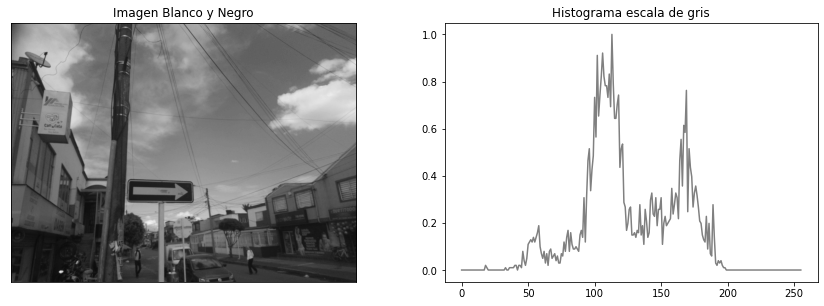

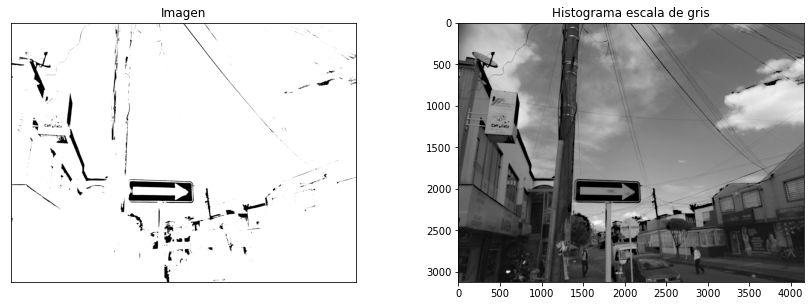

In [34]:
white_adapt(ima2,201,40)